In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path = 'C:/Users/nipun/Documents/Jupyter/Machine Learning Exercises/data/ex2data1.txt'
data = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
data.head()
# data.describe()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

Text(0,0.5,'Test 2 ')

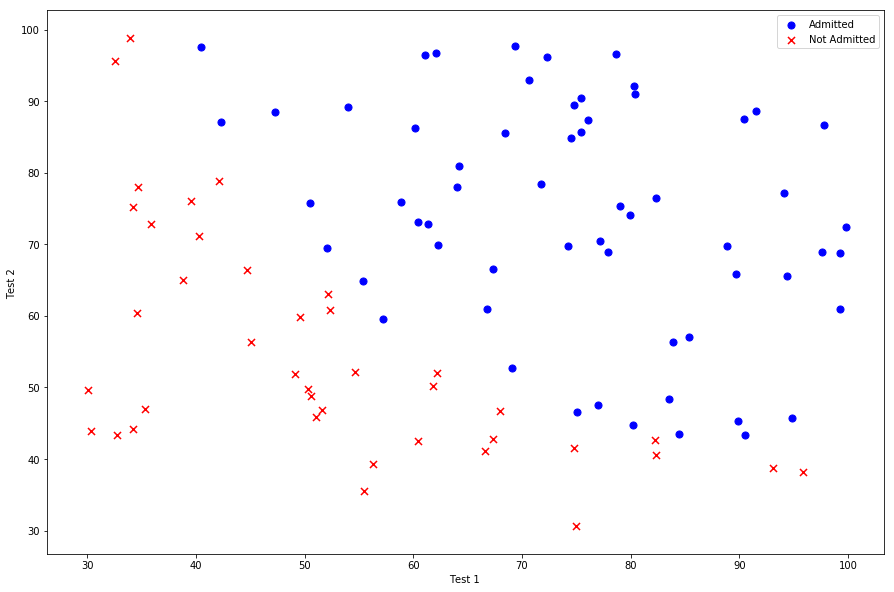

In [6]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s = 50, c = 'b', marker = 'o', label = 'Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s = 50, c = 'r', marker = 'x', label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Test 1 ')
ax.set_ylabel('Test 2 ')

In [86]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

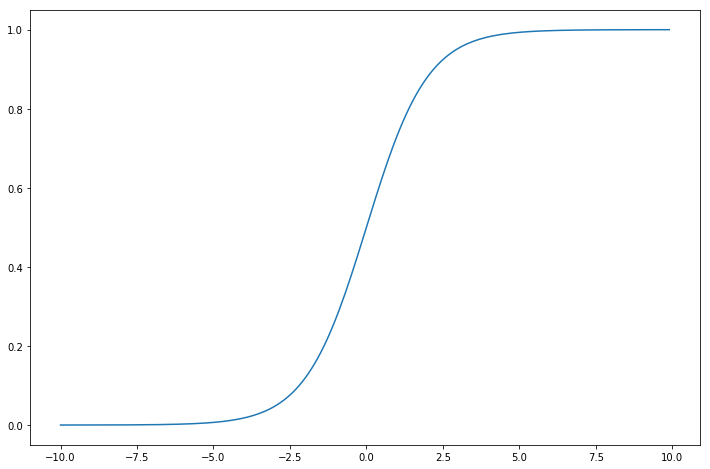

In [87]:
nums = np.arange(-10, 10, step = 0.1)

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(nums, sigmoid(nums))

In [88]:
def cost(theta, x, y,):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(x * theta.T)))
    second = np.multiply((1-y), np.log(1-sigmoid(x * theta.T)))
    
    return np.sum((first - second)/len(x))

In [90]:
data.insert(0, 'Ones', 1)

cols = data.shape[1]
x = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols-1: cols]

In [91]:
x = np.array(x.values)
y = np.array(y.values)
theta = np.zeros(3)

print(x.shape, y.shape, theta.shape)

(100, 3) (100, 1) (3,)


In [92]:
cost(theta,x,y)

0.6931471805599457

In [94]:
def gradient(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(x * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, x[:, i])
        grad[i] = np.sum(term) / len(x)
        
    return grad

In [98]:
def predict(theta, x):
    probability = sigmoid(x * theta.T)
    return[1 if x >= 0.5 else 0  for x in probability]

In [101]:
import scipy.optimize as opt
result = opt.fmin_tnc(func = cost, x0 = theta, fprime = gradient, args = (x, y))
cost(result[0], x, y)

0.20349770158947467

In [104]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, x)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy =', accuracy, '%')

accuracy = 89 %
